## Exercise 1

(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import erfi

In [2]:
rng = np.random.default_rng(12345)

In [3]:
def f(x):
    return stats.norm.pdf(x)

In [4]:
N = 100_000

In [5]:
a = 1
b = 2

We use the standard Monte Carlo:

In [6]:
x = stats.uniform.rvs(loc=a, scale=b - a, size=N, random_state=rng)
y = f(x) * (b - a)

The estimate of the integral is:

In [7]:
I_hat = np.mean(y)
I_hat

np.float64(0.13586905725880494)

The estimate of the standard error:

In [8]:
np.std(y, ddof=1) / np.sqrt(N)

np.float64(0.0001751391008024139)

The true value of the integral:

In [9]:
I = stats.norm.cdf(b) - stats.norm.cdf(a)
I

np.float64(0.13590512198327787)

(b) For the standard error, we have
$$\mathbb{V}[\hat{I}] = \mathbb{E}[\hat{I}^2] - \mathbb{E}[\hat{I}]^2,$$
where
$$\hat{I} = \frac{1}{N} \sum_{i=1}^N f(X_i),$$
with $X_i \sim \text{Uniform}(a, b)$ and
$$f(x) = \frac{e^{-x^2 / 2}}{\sqrt{2\pi}}(b - a).$$
In this exercise, $a=1$ and $b=2$.
Then
$$\mathbb{E}[\hat{I}] 
= \mathbb{E}\left[\frac{1}{N} \sum_{i=1}^N f(X_i)\right]
= \frac{1}{N} \sum_{i=1}^N \mathbb{E}\left[ \frac{e^{-X_i^2 / 2}}{\sqrt{2\pi}}(b-a) \right]
= \mathbb{E}\left[ \frac{e^{-X_i^2 / 2}}{\sqrt{2\pi}}(b-a) \right]
= \int_a^b \frac{e^{-x^2 / 2}}{\sqrt{2\pi}} dx
= I$$
and
$$\begin{split}
\mathbb{E}[\hat{I}^2] 
&= \mathbb{E}\left[\left(\frac{1}{N} \sum_{i=1}^N f(X_i)\right)^2\right] \\
&= \frac{1}{N^2} \mathbb{E}\left[ \sum_{i=1}^N \sum_{j=1}^N  \frac{e^{-(X_i + X_j)^2 / 2}}{2\pi}(b-a)^2 \right] \\
&= \frac{(b-a)^2}{2\pi N^2} \left( \sum_{i=1}^N \mathbb{E}\left[e^{-X_i^2}\right] +  \sum_{i=1}^N \sum_{j\neq i} \mathbb{E}\left[e^{-(X_i + X_j)^2 / 2}\right] \right) \\
&= \frac{(b-a)^2}{2\pi N^2} \left( \sum_{i=1}^N \mathbb{E}\left[e^{-X_i^2}\right] +  \sum_{i=1}^N \sum_{j\neq i} \mathbb{E}\left[e^{-X_i^2 / 2}\right] \mathbb{E}\left[e^{-X_j^2 / 2}\right] \right) \\
&= \frac{(b-a)^2}{2\pi N^2} \left( N \mathbb{E}\left[e^{-X_i^2}\right] +  N(N-1) \mathbb{E}\left[e^{-X_i^2 / 2}\right]^2 \right) \\
&= \frac{(b-a)}{2 \sqrt{\pi} N} \mathbb{E}\left[\frac{1}{\sqrt{2\pi \frac{1}{2} }}e^{-X_i^2} (b - a)\right] +  \frac{N-1}{N} \mathbb{E}\left[\frac{1}{\sqrt{2\pi}} e^{-X_i^2 / 2} (b-a)\right]^2 \\
&= \frac{(b-a)}{2 \sqrt{\pi} N} \int_a^b \frac{1}{\sqrt{2\pi \frac{1}{2}}}e^{-x^2} (b - a) dx +  \frac{N-1}{N} \left(\int_a^b \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2} (b-a) dx\right)^2 \\
&= \frac{(b-a)}{2 \sqrt{\pi} N} (\Phi(b\sqrt{2}) - \Phi(a\sqrt{2})) +  \frac{N-1}{N} I^2. \\
\end{split}$$
Therefore,
$$\begin{split}
\mathbb{V}[\hat{I}] 
&= \mathbb{E}[\hat{I}^2] - \mathbb{E}[\hat{I}]^2 \\
&= \frac{(b-a)}{2 \sqrt{\pi} N} (\Phi(b\sqrt{2}) - \Phi(a\sqrt{2})) + \frac{N-1}{N} I^2 - I^2 \\
&= \frac{(b-a)}{2 \sqrt{\pi} N} (\Phi(b\sqrt{2}) - \Phi(a\sqrt{2})) - \frac{1}{N} I^2. \\
\end{split}$$

The theoretical standard error is thus

In [10]:
np.sqrt(((b - a) * (stats.norm.cdf(b * np.sqrt(2)) - stats.norm.cdf(a * np.sqrt(2))) / 2 / np.sqrt(np.pi) - I ** 2) / N)

np.float64(0.00017483303493640907)

The value is very close to our estimate.

(c) To use importance sampling, we rewrite
$$I = \int_a^b \frac{e^{-x^2 / 2}}{\sqrt{2\pi}} dx = \int_{-\infty}^{+\infty} h(x) f(x) dx = \int_{-\infty}^{+\infty} h(x) \frac{f(x)}{g(x)} g(x) dx,$$
where
$$\begin{split}
h(x) &= \mathbb{1}_{[a, b]}(x) \\
f(x) &= \frac{e^{-x^2 / 2}}{\sqrt{2\pi}} \\
g(x) &= \frac{e^{-(x-\mu)^2 / (2 v^2)}}{\sqrt{2\pi} v} \\
\end{split}$$

The estimate of the integral is then
$$\hat{I} = \frac{1}{N} \sum_{i=1}^N h(X_i) w(X_i),$$
where
$$w(x) = \frac{f(x)}{g(x)}$$
and $X_i \sim g$.

In [11]:
def h(x):
    return np.where((x >= a) & (x <= b), 1, 0)

In [12]:
mu = (b + a) / 2

In [13]:
vs = [0.1, 1, 10]

In [14]:
proposals = [stats.norm(loc=mu, scale=v) for v in vs]
xs = [proposal.rvs(size=N, random_state=rng) for proposal in proposals]
ws = [f(x) / proposal.pdf(x) for x, proposal in zip(xs, proposals)]
I_hat = [np.mean(h(x) * w) for x, w in zip(xs, ws)]

In [15]:
I_hat

[np.float64(0.12472475845829438),
 np.float64(0.13617033878679044),
 np.float64(0.13567187095992)]

The histograms of the values used in calculating $\hat{I}$:

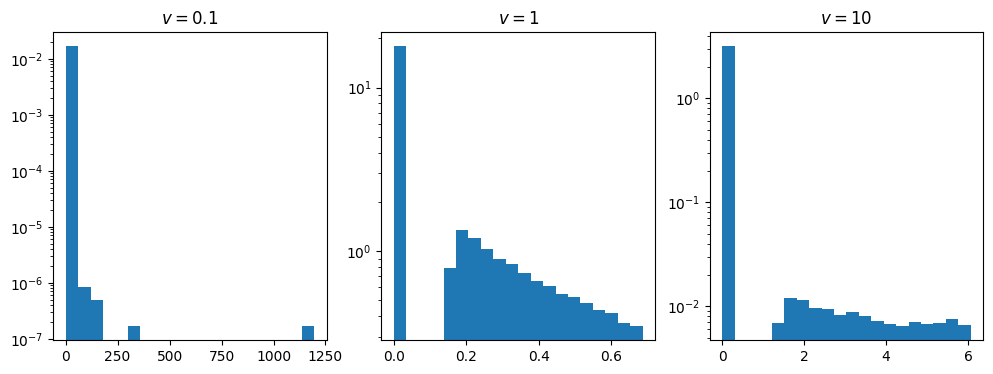

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, (x, w) in enumerate(zip(xs, ws)):
    axs[i].hist(h(x) * w, bins=20, density=True);
    axs[i].set_title(f'$v = {vs[i]}$');
    axs[i].set_yscale('log');

We can see that most of the weight is concentrated at 0, so we expect high variance of the resulting estimate.

For the standard error, we have
$$\begin{split}
\mathbb{E}[\hat{I}^2] 
&= \mathbb{E}\left[ \left(\frac{1}{N} \sum_{i=1}^N h(X_i) \frac{f(X_i)}{g(X_i)}\right)^2 \right] \\
&= \frac{1}{N^2} \mathbb{E}\left[ \sum_{i=1}^N \sum_{j=1}^N h(X_i) \frac{f(X_i)}{g(X_i)} h(X_j) \frac{f(X_j)}{g(X_j)} \right] \\
&= \frac{1}{N^2} \left( \sum_{i=1}^N \mathbb{E}\left[\left(h(X_i) \frac{f(X_i)}{g(X_i)}\right)^2\right] + \sum_{i=1}^N \sum_{j \neq i} \mathbb{E}\left[h(X_i) \frac{f(X_i)}{g(X_i)}\right] \mathbb{E}\left[h(X_j) \frac{f(X_j)}{g(X_j)}\right] \right) \\
&= \frac{1}{N^2} \left( N \mathbb{E}\left[\left(h(X_i) \frac{f(X_i)}{g(X_i)}\right)^2\right] + N(N-1) \mathbb{E}\left[h(X_i) \frac{f(X_i)}{g(X_i)}\right]^2 \right) \\
&= \frac{1}{N} \left( \int_{-\infty}^{+\infty} \left(h(x) \frac{f(x)}{g(x)}\right)^2 g(x) dx + (N-1) \left(\int_{-\infty}^{+\infty} h(x) \frac{f(x)}{g(x)} g(x) dx\right)^2 \right) \\
&= \frac{1}{N} \left( \int_{-\infty}^{+\infty} h(x)^2 \frac{f(x)^2}{g(x)} dx + (N-1) \left(\int_{-\infty}^{+\infty} h(x) f(x) dx\right)^2 \right) \\
&= \frac{1}{N} \left( \int_a^b \frac{f(x)^2}{g(x)} dx + (N-1) I^2 \right), \\
\mathbb{E}[\hat{I}]
&= \mathbb{E}\left[ \frac{1}{N} \sum_{i=1}^N h(X_i) \frac{f(X_i)}{g(X_i)} \right] \\
&= \frac{1}{N} \sum_{i=1}^N \mathbb{E}\left[h(X_i) \frac{f(X_i)}{g(X_i)} \right] \\
&= \mathbb{E}\left[h(X_i) \frac{f(X_i)}{g(X_i)} \right] \\
&= \int_{-\infty}^{+\infty} h(x) \frac{f(x)}{g(x)} g(x) dx \\
&= \int_{-\infty}^{+\infty} h(x) f(x) dx \\
&= \int_{a}^{b} f(x) dx \\
&= I
\end{split}$$
and
$$\begin{split}
\mathbb{V}[\hat{I}]
&= \mathbb{E}[\hat{I}^2] - \mathbb{E}[\hat{I}]^2 \\
&= \frac{1}{N} \left( \int_a^b \frac{f(x)^2}{g(x)} dx + (N-1) I^2 \right) - I^2 \\
&= \frac{1}{N} \left( \int_a^b \frac{f(x)^2}{g(x)} dx - I^2 \right). \\
\end{split}$$

If $2v^2 - 1 > 0$, i.e. $v > \frac{1}{\sqrt{2}}$, then
$$\begin{split}
\int_a^b \frac{f(x)^2}{g(x)} dx
&= \int_a^b \left(\frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{x^2}{2}\right\}\right)^2 \left( \frac{1}{\sqrt{2\pi} v} \exp\left\{-\frac{(x-\mu)^2}{2v^2}\right\} \right)^{-1} dx \\
&= \frac{v}{\sqrt{2\pi}} \int_a^b \exp\left\{-x^2 + \frac{(x-\mu)^2}{2v^2}\right\} dx \\
&= \frac{v}{\sqrt{2\pi}} \int_a^b \exp\left\{-\frac{1}{2v^2} \left(2 v^2 x^2 -x^2 + 2 \mu x - \mu^2\right) \right\} dx \\
&= \frac{v}{\sqrt{2\pi}} \exp\left\{ \frac{\mu^2}{2v^2} \right\} \int_a^b \exp\left\{-\frac{1}{2v^2} \left((2 v^2 - 1) x^2 + 2 \mu x\right) \right\} dx \\
&= \frac{v}{\sqrt{2\pi}} \exp\left\{ \frac{\mu^2}{2v^2} \right\} \int_a^b \exp\left\{-\frac{2 v^2 - 1}{2v^2}\left( x^2 + 2 \frac{\mu}{2 v^2 - 1} x + \left(\frac{\mu}{2 v^2 - 1}\right)^2 - \left(\frac{\mu}{2 v^2 - 1}\right)^2 \right) \right\} dx \\
&= \frac{v}{\sqrt{2\pi}} \exp\left\{ \frac{\mu^2}{2v^2} + \frac{\mu^2}{2v^2 (2v^2 - 1)} \right\} \int_a^b \exp\left\{-\frac{2 v^2 - 1}{2v^2}\left( x + \frac{\mu}{2 v^2 - 1} \right)^2 \right\} dx \\
&= \frac{v}{\sqrt{2\pi}} \exp\left\{ \frac{\mu^2}{2v^2 - 1}\right\} \int_a^b \exp\left\{-\frac{2 v^2 - 1}{2v^2}\left( x + \frac{\mu}{2 v^2 - 1} \right)^2 \right\} dx \\
&= \frac{v^2}{\sqrt{2v^2 - 1}}\exp\left\{ \frac{\mu^2}{2v^2 - 1} \right\} \int_a^b \frac{1}{\sqrt{2\pi} \sqrt{\frac{v^2}{2v^2 - 1}}} \exp\left\{-\frac{2 v^2 - 1}{2v^2}\left( x + \frac{\mu}{2 v^2 - 1} \right)^2 \right\} dx \\
&= \frac{v^2}{\sqrt{2v^2 - 1}}\exp\left\{ \frac{\mu^2}{2v^2 - 1} \right\} \left( \Phi\left(\frac{b - \mu^*}{\sigma^*}\right) - \Phi\left(\frac{a - \mu^*}{\sigma^*}\right) \right), \\
\end{split}$$
where
$$\begin{split}
\mu^* &= -\frac{\mu}{2 v^2 - 1} \\
\sigma^* &= \sqrt{\frac{v^2}{2 v^2 - 1}}. \\
\end{split}$$

If $2v^2 - 1=0$, so $v = \frac{1}{\sqrt{2}}$, then
$$\begin{split}
\int_a^b \frac{f(x)^2}{g(x)} dx
&= \frac{v}{\sqrt{2\pi}} \exp\left\{ \frac{\mu^2}{2v^2} \right\} \int_a^b \exp\left\{-\frac{1}{2v^2} \left((2 v^2 - 1) x^2 + 2 \mu x\right) \right\} dx \\
&= \frac{v}{\sqrt{2\pi}} \exp\left\{ \frac{\mu^2}{2v^2} \right\} \int_a^b \exp\left\{-\frac{\mu x}{v^2} \right\} dx \\
&= \frac{v^3}{\mu\sqrt{2\pi}} \exp\left\{ \frac{\mu^2}{2v^2} \right\} \left( \exp\left\{-\frac{\mu a}{v^2} \right\} - \exp\left\{-\frac{\mu b}{v^2} \right\} \right) \\
\end{split}$$

If $2v^2 - 1 < 0$, i.e. $v < \frac{1}{\sqrt{2}}$, then
$$\begin{split}
\int_a^b \frac{f(x)^2}{g(x)} dx
&= \frac{v}{\sqrt{2\pi}} \exp\left\{ \frac{\mu^2}{2v^2 - 1}\right\} \int_a^b \exp\left\{-\frac{2 v^2 - 1}{2v^2}\left( x + \frac{\mu}{2 v^2 - 1} \right)^2 \right\} dx \\
&= \frac{v}{\sqrt{2\pi}} \exp\left\{ \frac{\mu^2}{2v^2 - 1}\right\} \sqrt{\frac{2v^2}{1-2v^2}} \int_{a^*}^{b^*} \exp\left\{\left(\sqrt{\frac{1 - 2 v^2}{2v^2}}\left( x + \frac{\mu}{2 v^2 - 1} \right)\right)^2 \right\} d\left( \sqrt{\frac{1 - 2 v^2}{2v^2}}\left( x + \frac{\mu}{2 v^2 - 1} \right) \right) \\
&= \frac{v}{2\sqrt{2}} \exp\left\{ \frac{\mu^2}{2v^2-1}\right\} \sqrt{\frac{2v^2}{1-2v^2}} \frac{2}{\sqrt{\pi}} \int_{a^*}^{b^*} e^{y^2} dy \\
&= \frac{v}{2\sqrt{2}} \exp\left\{ \frac{\mu^2}{2v^2-1}\right\} \sqrt{\frac{2v^2}{1-2v^2}} (\text{erfi}(b^*) - \text{erfi}(a^*)), \\
&= \frac{v^2}{2(1 - 2v^2)} \exp\left\{ \frac{\mu^2}{2v^2-1}\right\} (\text{erfi}(b^*) - \text{erfi}(a^*)), \\
\end{split}$$
where
$$\begin{split}
y &= \sqrt{\frac{1 - 2 v^2}{2v^2}}\left( x + \frac{\mu}{2 v^2 - 1} \right) \\
a^* &= \sqrt{\frac{1 - 2 v^2}{2v^2}}\left( a + \frac{\mu}{2 v^2 - 1} \right) \\
b^* &= \sqrt{\frac{1 - 2 v^2}{2v^2}}\left( b + \frac{\mu}{2 v^2 - 1} \right) \\
\end{split}$$

The function to evaluate the integral above for all three cases:

In [17]:
def integral(v):
    if v > 1 / np.sqrt(2):
        d = 2 * v ** 2 - 1
        mu_star = -mu / d
        sigma_star = v / np.sqrt(d)
        mod_norm = stats.norm(loc=mu_star, scale=sigma_star)
        return v ** 2 / np.sqrt(d) * np.exp(mu ** 2 / d) * (mod_norm.cdf(b) - mod_norm.cdf(a))
    elif v == 1 / np.sqrt(2):
        return v ** 3 / mu / np.sqrt(2 * np.pi) * np.exp(mu ** 2 / 2 / v ** 2) * (
            np.exp(-mu * a / v ** 2) - np.exp(-mu * b / v ** 2)
        )
    else:
        d = 1 - 2 * v ** 2
        def y(x):
            return np.sqrt(d / 2 / v ** 2) * (x - mu / d)
        return v ** 2 / 2 / d * np.exp(-mu ** 2 / d) * (erfi(y(b)) - erfi(y(a)))

In [18]:
def sigma_hat(v):
    variance = (integral(v) - I ** 2) / N
    return np.sqrt(variance)

In [19]:
[sigma_hat(v) for v in vs]

[np.float64(0.029013669205501337),
 np.float64(0.0006183715615398658),
 np.float64(0.0022834016490905027)]

(d) By Theorem 24.5, the optimal choice of $g$ is given by
$$\begin{split}
g^*(x) 
&= \frac{|h(x)| f(x)}{\int |h(s)| f(s) ds} \\
&= \frac{\frac{1}{\sqrt{2\pi}} \mathbb{1}_{[a,b]} e^{-x^2/2}}{\frac{1}{\sqrt{2\pi}} \int_a^b e^{-s^2/2} ds} \\
&= \frac{1}{\sqrt{2\pi}(\Phi(b) - \Phi(a))} e^{-x^2/2} \mathbb{1}_{[a,b]}. \\
\end{split}$$

In this case, for the standard error we have
$$\begin{split}
\mathbb{V}[\hat{I}]
&= \mathbb{E}[\hat{I}^2] - \mathbb{E}[\hat{I}]^2 \\
&= \frac{1}{N} \left( \int_a^b \frac{f(x)^2}{g^*(x)} dx + (N-1) I^2 \right) - I^2 \\
&= \frac{1}{N} \left( \int_a^b \frac{f(x)^2}{g^*(x)} dx - I^2 \right) \\
&= \frac{1}{N} \left( \int_a^b \frac{f(x)^2}{\frac{|h(x)| f(x)}{\int |h(s)| f(s) ds}} dx - I^2 \right) \\
&= \frac{1}{N} \left( \left(\int_a^b f(x) dx\right)^2 - I^2 \right) \\
&= \frac{1}{N} \left( I^2 - I^2 \right) \\
&= 0.
\end{split}$$

## Exercise 2

We have
$$\begin{split}
\mathbb{E}[\hat{f}_X(x)]
&= \mathbb{E}\left[ \frac{1}{N} \sum_{i=1}^N \frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)} \right] \\
&= \frac{1}{N} \sum_{i=1}^N \mathbb{E}\left[ \frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)} \right] \\
&= \mathbb{E}\left[ \frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)} \right] \\
&= \mathbb{E}\left[ \frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)} \right] \\
&= \iint \frac{f_{X,Y}(x, y) w(s)}{f_{X,Y}(s, y)} f_{X,Y}(s, y) ds dy \\
&= \iint f_{X,Y}(x, y) w(s) ds dy \\
&= \int f_{X,Y}(x, y) dy \int w(s) ds \\
&= f_{X}(x). \\
\end{split}$$
Theorem 5.6 (the law of large numbers) then implies
$$\hat{f}_X(x) \xrightarrow{P} f_X(x).$$

Now
$$\begin{split}
\mathbb{E}[\hat{f}_X(x)^2]
&= \mathbb{E}\left[ \left( \frac{1}{N} \sum_{i=1}^N \frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)} \right)^2 \right] \\
&= \frac{1}{N^2} \mathbb{E}\left[\sum_{i=1}^N \sum_{j=1}^N \frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)} \frac{f_{X,Y}(x, Y_j) w(X_j)}{f_{X,Y}(X_j, Y_j)} \right] \\
&= \frac{1}{N^2} \mathbb{E}\left[\sum_{i=1}^N \left(\frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)}\right)^2 + \sum_{i=1}^N \sum_{j\neq i} \frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)} \frac{f_{X,Y}(x, Y_j) w(X_j)}{f_{X,Y}(X_j, Y_j)} \right] \\
&= \frac{1}{N^2} \left( \sum_{i=1}^N \mathbb{E}\left[\left(\frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)}\right)^2\right] + \sum_{i=1}^N \sum_{j\neq i} \mathbb{E}\left[\frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)} \frac{f_{X,Y}(x, Y_j) w(X_j)}{f_{X,Y}(X_j, Y_j)}\right] \right) \\
&= \frac{1}{N^2} \left( N \mathbb{E}\left[\left(\frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)}\right)^2\right] + N(N-1) \mathbb{E}\left[\frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)}\right]^2 \right) \\
&= \frac{1}{N} \left( \mathbb{E}\left[\left(\frac{f_{X,Y}(x, Y_i) w(X_i)}{f_{X,Y}(X_i, Y_i)}\right)^2\right] + (N-1) f_X(x)^2 \right) \\
&= \frac{1}{N} \left( \iint \frac{f_{X,Y}(x, y)^2 w(s)^2}{f_{X,Y}(s, y)^2} f_{X,Y}(s, y) ds dy  + (N-1) f_X(x)^2 \right) \\
&= \frac{1}{N} \left( \iint \frac{f_{X,Y}(x, y)^2 w(s)^2}{f_{X,Y}(s, y)} ds dy  + (N-1) f_X(x)^2 \right) \\
\end{split}$$
so
$$\begin{split}
\mathbb{V}[\hat{f}_X(x)] 
&= \mathbb{E}[\hat{f}_X(x)^2] - \mathbb{E}[\hat{f}_X(x)]^2 \\
&= \frac{1}{N} \left( \iint \frac{f_{X,Y}(x, y)^2 w(s)^2}{f_{X,Y}(s, y)} ds dy  + (N-1) f_X(x)^2 \right) - f_X(x)^2 \\
&= \frac{1}{N} \left( \iint \frac{f_{X,Y}(x, y)^2 w(s)^2}{f_{X,Y}(s, y)} ds dy  - f_X(x)^2 \right) \\
\end{split}.$$

Assuming
$$\iint \frac{f_{X,Y}(x, y)^2 w(s)^2}{f_{X,Y}(s, y)} ds dy < \infty,$$
and
$$f_X(x) < \infty,$$
we have $\mathbb{V}[\hat{f}_X(x)] \to 0$ as $N \to \infty$.

(b)

In [20]:
def marginal_x(w):
    def func(s):
        if isinstance(s, np.ndarray):
            s = s.reshape(-1, 1)
        y = stats.norm.rvs(size=(1, N), random_state=rng)
        x = stats.norm.rvs(loc=y, scale=np.sqrt(1 + y ** 2), size=(1, N), random_state=rng)
        return np.mean(stats.norm.pdf(s, loc=y, scale=np.sqrt(1 + y ** 2)) * w(x) / stats.norm.pdf(x, loc=y, scale=np.sqrt(1 + y ** 2)), axis=1)
    return func

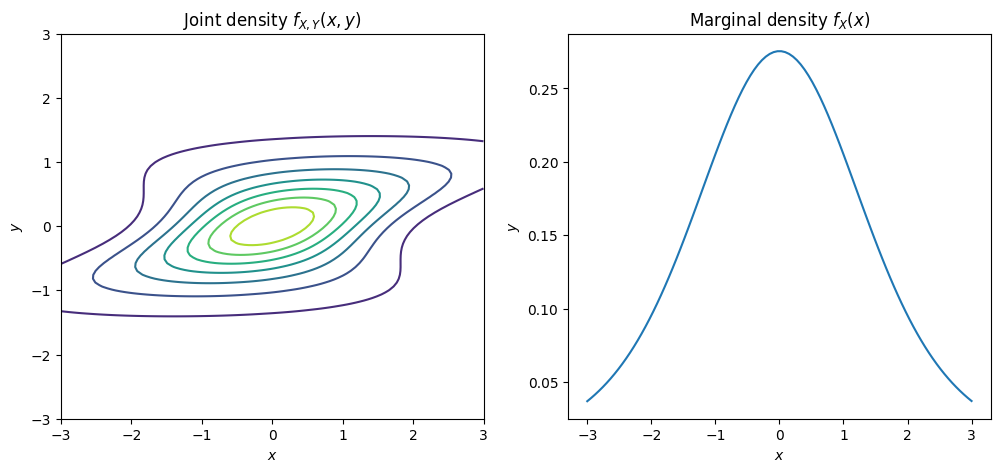

In [21]:
xs = np.linspace(-3, 3, 100)
ys = np.linspace(-3, 3, 100)
xs_m, ys_m = np.meshgrid(xs, ys)
zs = stats.norm.pdf(ys_m) * stats.norm.pdf(xs_m, loc=ys_m, scale=1 + ys_m ** 2)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].contour(xs_m, ys_m, zs);
axs[0].set_xlabel('$x$');
axs[0].set_ylabel('$y$');
axs[0].set_title('Joint density $f_{X, Y}(x, y)$');

axs[1].plot(xs, marginal_x(stats.norm.pdf)(xs));
axs[1].set_xlabel('$x$');
axs[1].set_ylabel('$y$');
axs[1].set_title('Marginal density $f_{X}(x)$');

## Exercise 3

(a) The conditional density of $U$ given $X$ is
$$f_{U|X}(u|x) = \frac{1}{Mg(x)},$$
so the probability of obtaining a value of $Y \leq y$ is
$$\begin{split}
\mathbb{P}(Y \leq y)
&= \mathbb{P}(X \leq y|X \text{ was accepted}) \\
&= \frac{\mathbb{P}(X \leq y, X \text{ was accepted})}{\mathbb{P}(X \text{ was accepted})}. \\
\end{split}$$
We have
$$\begin{split}
\mathbb{P}(X \leq y, X \text{ was accepted})
&= \int_{-\infty}^y \left( \int_0^{f(x)} g(x) f_{U|X}(u|x) du \right) dx \\
&= \int_{-\infty}^y \left( \int_0^{f(x)} g(x) \frac{1}{M g(x)} du \right) dx \\
&= \frac{1}{M} \int_{-\infty}^y \left( \int_0^{f(x)} du \right) dx \\
&= \frac{1}{M} \int_{-\infty}^y f(x) dx \\
&= \frac{1}{M} F(y) \\
\end{split}$$
and
$$\begin{split}
\mathbb{P}(X \text{ was accepted})
&= \int_{-\infty}^{+\infty} \left( \int_0^{f(x)} g(x) f_{U|X}(u|x) du \right) dx \\
&= \int_{-\infty}^{+\infty} \left( \int_0^{f(x)} g(x) \frac{1}{M g(x)} du \right) dx \\
&= \frac{1}{M} \int_{-\infty}^{+\infty} \left( \int_0^{f(x)} du \right) dx \\
&= \frac{1}{M} \int_{-\infty}^{+\infty} f(x) dx \\
&= \frac{1}{M}, \\
\end{split}$$
thus
$$\mathbb{P}(Y \leq y) = \frac{\mathbb{P}(X \leq y, X \text{ was accepted})}{\mathbb{P}(X \text{ was accepted})} = F(y).$$
We conclude that $Y$ has distribution $f$.

(b)

In [22]:
n = 1000

In [23]:
def accept_reject(f, g, M):
    while True:
        x = g.rvs(size=1, random_state=rng)[0]
        u = stats.uniform.rvs(size=1, random_state=rng)[0]
        if u <= f.pdf(x) / M / g.pdf(x):
            return x    

We pick a value of $M$ to satisfy $f(x) \leq M g(x)$ for all $x$:

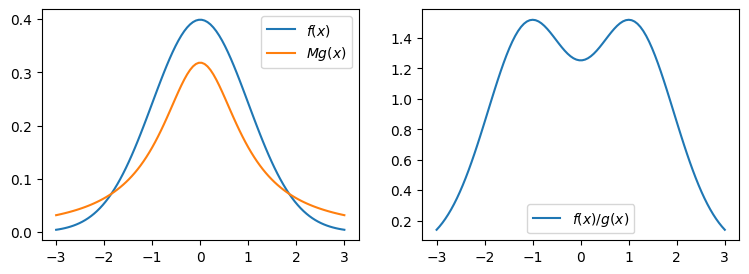

In [24]:
xs = np.linspace(-3, 3, 100)

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
axs[0].plot(xs, stats.norm.pdf(xs), label='$f(x)$');
axs[0].plot(xs, stats.cauchy.pdf(xs), label='$M g(x)$');
axs[0].legend();

axs[1].plot(xs, stats.norm.pdf(xs) / stats.cauchy.pdf(xs), label='$f(x) / g(x)$');
axs[1].legend();

We need $f(x) \leq M g(x)$, or, equivalently,
$$M \geq \frac{f(x)}{g(x)} = \frac{1}{\sqrt{2\pi}}e^{-x^2/2} \pi (1 + x^2).$$
Taking the derivative of the LHS and setting it to 0, we have
$$\begin{split}
\left(\frac{1}{\sqrt{2\pi}}e^{-x^2/2} \pi (1 + x^2)\right)'
&= \frac{\pi}{\sqrt{2\pi}} \left(e^{-x^2/2}(-x)(1 + x^2) + e^{-x^2/2} \cdot 2x \right) \\
&= - \frac{x \pi}{\sqrt{2\pi}} e^{-x^2/2} (x^2 - 1) \\
&= - \frac{x \pi}{\sqrt{2\pi}} e^{-x^2/2} (x - 1) (x + 1) \\
&= 0,
\end{split}$$
so the possible extremums are at $x = 0$, $x = 1$ and $x = -1$. Taking the second derivative of the LHS above, we have
$$\begin{split}
\left(\frac{1}{\sqrt{2\pi}}e^{-x^2/2} \pi (1 + x^2)\right)''
&= \left( - \frac{x \pi}{\sqrt{2\pi}} e^{-x^2/2} (x^2 - 1) \right)' \\
&= - \frac{\pi}{\sqrt{2\pi}} e^{-x^2/2} (x^2 - 1) + \frac{x^2 \pi}{\sqrt{2\pi}} e^{-x^2/2} (x^2 - 1) - \frac{2 x^2 \pi}{\sqrt{2\pi}} e^{-x^2/2} \\
&= \sqrt{\frac{\pi}{2}} e^{-x^2/2} (-(x^2 - 1) + x^2 (x^2 - 1) - 2 x^2) \\
&= \sqrt{\frac{\pi}{2}} e^{-x^2/2} (-x^2 + 1 + x^4 - x^2 - 2 x^2) \\
&= \sqrt{\frac{\pi}{2}} e^{-x^2/2} (x^4 - 4 x^2 + 1). \\
\end{split}$$
We see that the second derivative is positive at $x = 0$ and negative at $x=1$ and $x=-1$, therefore the LHS attains its maximums at $x = 1$ and $x = -1$. The value of $\frac{f(x)}{g(x)}$ at the two maximums is
$$\sqrt{2\pi} e^{-1/2}$$

In [25]:
M = np.sqrt(2 * np.pi) * np.exp(-0.5)
M

np.float64(1.5203469010662807)

In [26]:
y = np.fromiter((accept_reject(stats.norm, stats.cauchy, M) for _ in range(n)), float)

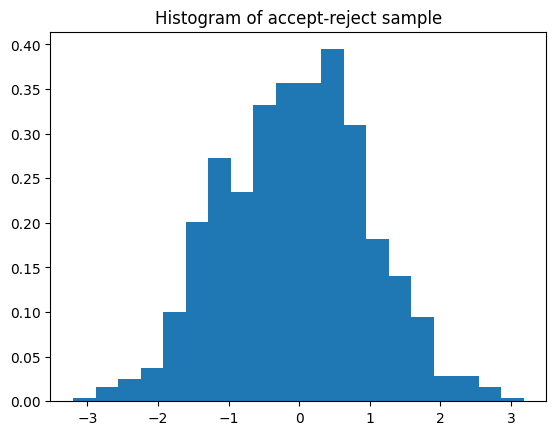

In [27]:
fig, ax = plt.subplots()
ax.hist(y, bins=20, density=True);
ax.set_title('Histogram of accept-reject sample');

It is difficult to judge the quality of the sample based on this histogram.

## Exercise 4

(a)

In [28]:
def sample_chain(theta_sampler, theta_init, n_samples):
    # set the starting values
    theta = np.array(theta_init, copy=True)

    # create an array for the trace
    trace = np.empty((n_samples + 1, theta_init.shape[0]))

    # store the initial values
    trace[0, :] = theta

    # sample variables
    for i in range(n_samples):
        # sample new theta
        theta = theta_sampler(theta)

        # record the value in the trace
        trace[i + 1, :] = theta

    return trace

In [29]:
def metropolis_independence_step(log_target_density, log_proposal_density, proposal_sampler, rng):
    def sampler(theta):
        # propose a new value
        theta_proposed = proposal_sampler(theta)

        # decide whether to accept the new value
        log_acceptance_probability = (
            log_target_density(theta_proposed) + log_proposal_density(theta) - log_target_density(theta) - log_proposal_density(theta_proposed)
        )
        if log_acceptance_probability > 0:
            return theta_proposed
        u = rng.random()
        if u == 0 or np.log(u) < log_acceptance_probability:
            return theta_proposed
        else:
            return theta

    return sampler

In [30]:
theta1 = 1.5
theta2 = 2.0

In [31]:
def log_target_density(z):
    return -1.5 * np.log(z) - theta1 * z - theta2 / z

In [32]:
proposal_distr = stats.gamma(a=2, scale=1)

In [33]:
n = 1000

In [34]:
def evaluate(proposal_distr, n):
    proposal_sampler = lambda theta: proposal_distr.rvs(size=1, random_state=rng)
    sampler = metropolis_independence_step(log_target_density, proposal_distr.logpdf, proposal_sampler, rng)
    x0 = proposal_distr.rvs(size=1, random_state=rng)
    z = sample_chain(sampler, x0, n)
    return z, np.mean(z), np.mean(1 / z)

We are given $\mathbb{E}[Z] = \sqrt{\theta_2 / \theta_1}$:

In [35]:
np.sqrt(theta2 / theta1)

np.float64(1.1547005383792515)

And $\mathbb{E}[1 / Z] = \sqrt{\theta_1 / \theta_2} + 1 / (2 \theta_2)$:

In [36]:
np.sqrt(theta1 / theta2) + 1 / (2 * theta2)

np.float64(1.1160254037844386)

We try sampling using different Gamma distributions as proposals:

In [37]:
z, mean, inv_mean = evaluate(stats.gamma(a=2, scale=1), n)
mean, inv_mean

(np.float64(1.1351831458325068), np.float64(1.1379360191773238))

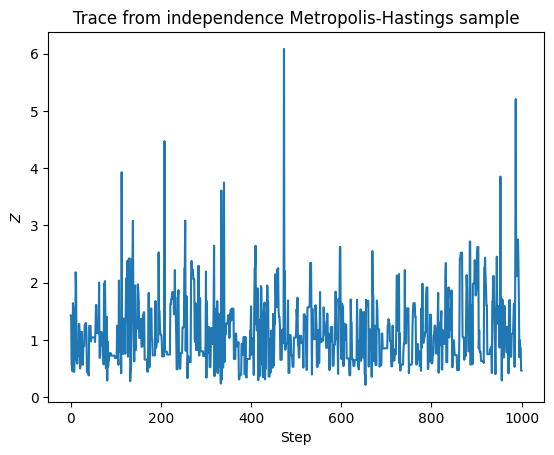

In [38]:
fig, ax = plt.subplots()
ax.plot(z);
ax.set_title('Trace from independence Metropolis-Hastings sample');
ax.set_xlabel('Step');
ax.set_ylabel('$Z$');

In [39]:
z, mean, inv_mean = evaluate(stats.gamma(a=0.5, scale=1), n)
mean, inv_mean

(np.float64(1.243803662521153), np.float64(1.0420304603746071))

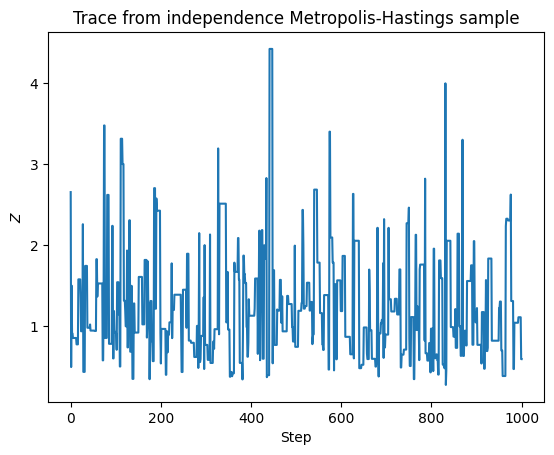

In [40]:
fig, ax = plt.subplots()
ax.plot(z);
ax.set_title('Trace from independence Metropolis-Hastings sample');
ax.set_xlabel('Step');
ax.set_ylabel('$Z$');

(b)

If $W = \log Z$ and $Z = e^W$, we have from expression (2.12)
$$\begin{split}
f_W(w) 
&= f_Z(e^w) e^w \\
&\propto e^{-\frac{3}{2}w} \exp\left\{ -\theta_1 e^w - \theta_2 e^{-w} + 2 \sqrt{\theta_1 \theta_2} + \log\left(\sqrt{2 \theta_2}\right) \right\} e^w \\
&= \exp\left\{ - \frac{w}{2} -\theta_1 e^w - \theta_2 e^{-w} + 2 \sqrt{\theta_1 \theta_2} + \log\left(\sqrt{2 \theta_2}\right) \right\} \\
\end{split}$$

In [41]:
def metropolis_random_walk_step(log_target_density, proposal_sampler, rng):
    def sampler(theta: np.ndarray) -> np.ndarray:
        # propose a new value
        theta_proposed = proposal_sampler(theta)

        # decide whether to accept the new value
        log_acceptance_probability = np.minimum(
            0, 
            log_target_density(theta_proposed) - log_target_density(theta)
        )
        u = rng.random()
        if u == 0 or np.log(u) < log_acceptance_probability:
            return theta_proposed
        else:
            return theta

    return sampler

In [42]:
def rw_proposal_sampler(step_size, rng, n_dim: int = 1):
    G = step_size * np.identity(n_dim)
    def sampler(theta: np.ndarray) -> np.ndarray:
        xi = stats.norm.rvs(size=n_dim, random_state=rng)
        return theta + G @ xi
    return sampler

In [43]:
eps = 1.5

In [44]:
def log_target_density(w):
    return -w / 2 - theta1 * np.exp(w) - theta2 * np.exp(-w)

In [45]:
sampler = metropolis_random_walk_step(log_target_density, rw_proposal_sampler(eps, rng), rng)

In [46]:
x0 = np.array([0])
w = sample_chain(sampler, x0, n)
z = np.exp(w)

In [47]:
np.mean(z), np.mean(1 / z)

(np.float64(1.163544595291126), np.float64(1.1119926364434214))

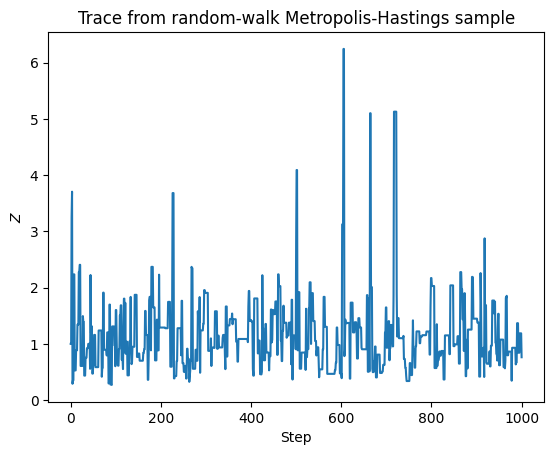

In [48]:
fig, ax = plt.subplots()
ax.plot(z);
ax.set_title('Trace from random-walk Metropolis-Hastings sample');
ax.set_xlabel('Step');
ax.set_ylabel('$Z$');

## Exercise 5

(a) The likelihood is given by expression (13.35):
$$\mathcal{L}(\beta) = \prod_{i=1}^n p_i(\beta)^{Y_i} (1 - p_i(\beta))^{1 - Y_i},$$
where
$$p_i(\beta) = \frac{e^{\beta_0+\sum_{j=1}^k \beta_j x_{ij}}}{1 + e^{\beta_0+\sum_{j=1}^k \beta_j x_{ij}}}$$

In [49]:
import pandas as pd
import arviz as az

In [50]:
data = pd.read_csv('../ch13/coris.csv', index_col=0)
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0


In [51]:
y = data['chd'].values
X = data.iloc[:, :9].values

The dimension of the parameter space:

In [52]:
d = X.shape[1] + 1
d

10

In [53]:
def gibbs_step(conditional_samplers):
    """Perform a Gibbs sampling step by sampling from conditional distributions of each variable in turn"""
    def sampler(theta):
        for sampler in conditional_samplers:
            theta = sampler(theta)
        return theta
    return sampler

In [54]:
def gibbs_rw_proposal_sampler(i, step_size, rng):
    def sampler(theta: np.ndarray) -> np.ndarray:
        xi = step_size * stats.norm.rvs(size=1, random_state=rng)[0]
        theta = theta.copy()
        theta[i] += xi
        return theta
    return sampler

In [55]:
def to_arviz(chains, var_names) -> az.InferenceData:
    assert len(chains) > 0
    return az.from_dict({
        var_name: np.stack([chain[:, i] for chain in chains]) for i, var_name in enumerate(var_names)
    })

In [56]:
def log_target_density(betas):
    u = np.exp(betas[0] + X @ betas[1:])
    pi = u / (1 + u)
    return np.sum(np.log(np.where(y == 1, pi, 1 - pi)))

In [57]:
eps = 0.1

In [58]:
conditional_samplers = [
    metropolis_random_walk_step(log_target_density, gibbs_rw_proposal_sampler(i, eps, rng), rng) for i in range(d)
]

In [59]:
gibbs_sampler = gibbs_step(conditional_samplers)

In [60]:
n = 10_000

In [61]:
%%time
beta = sample_chain(gibbs_sampler, np.zeros(d), n)

/tmp/ipykernel_48754/1913787248.py:4: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.where(y == 1, pi, 1 - pi)))


CPU times: user 19.7 s, sys: 393 ms, total: 20.1 s
Wall time: 19.7 s


We plot the histograms and traces for posterior samples:

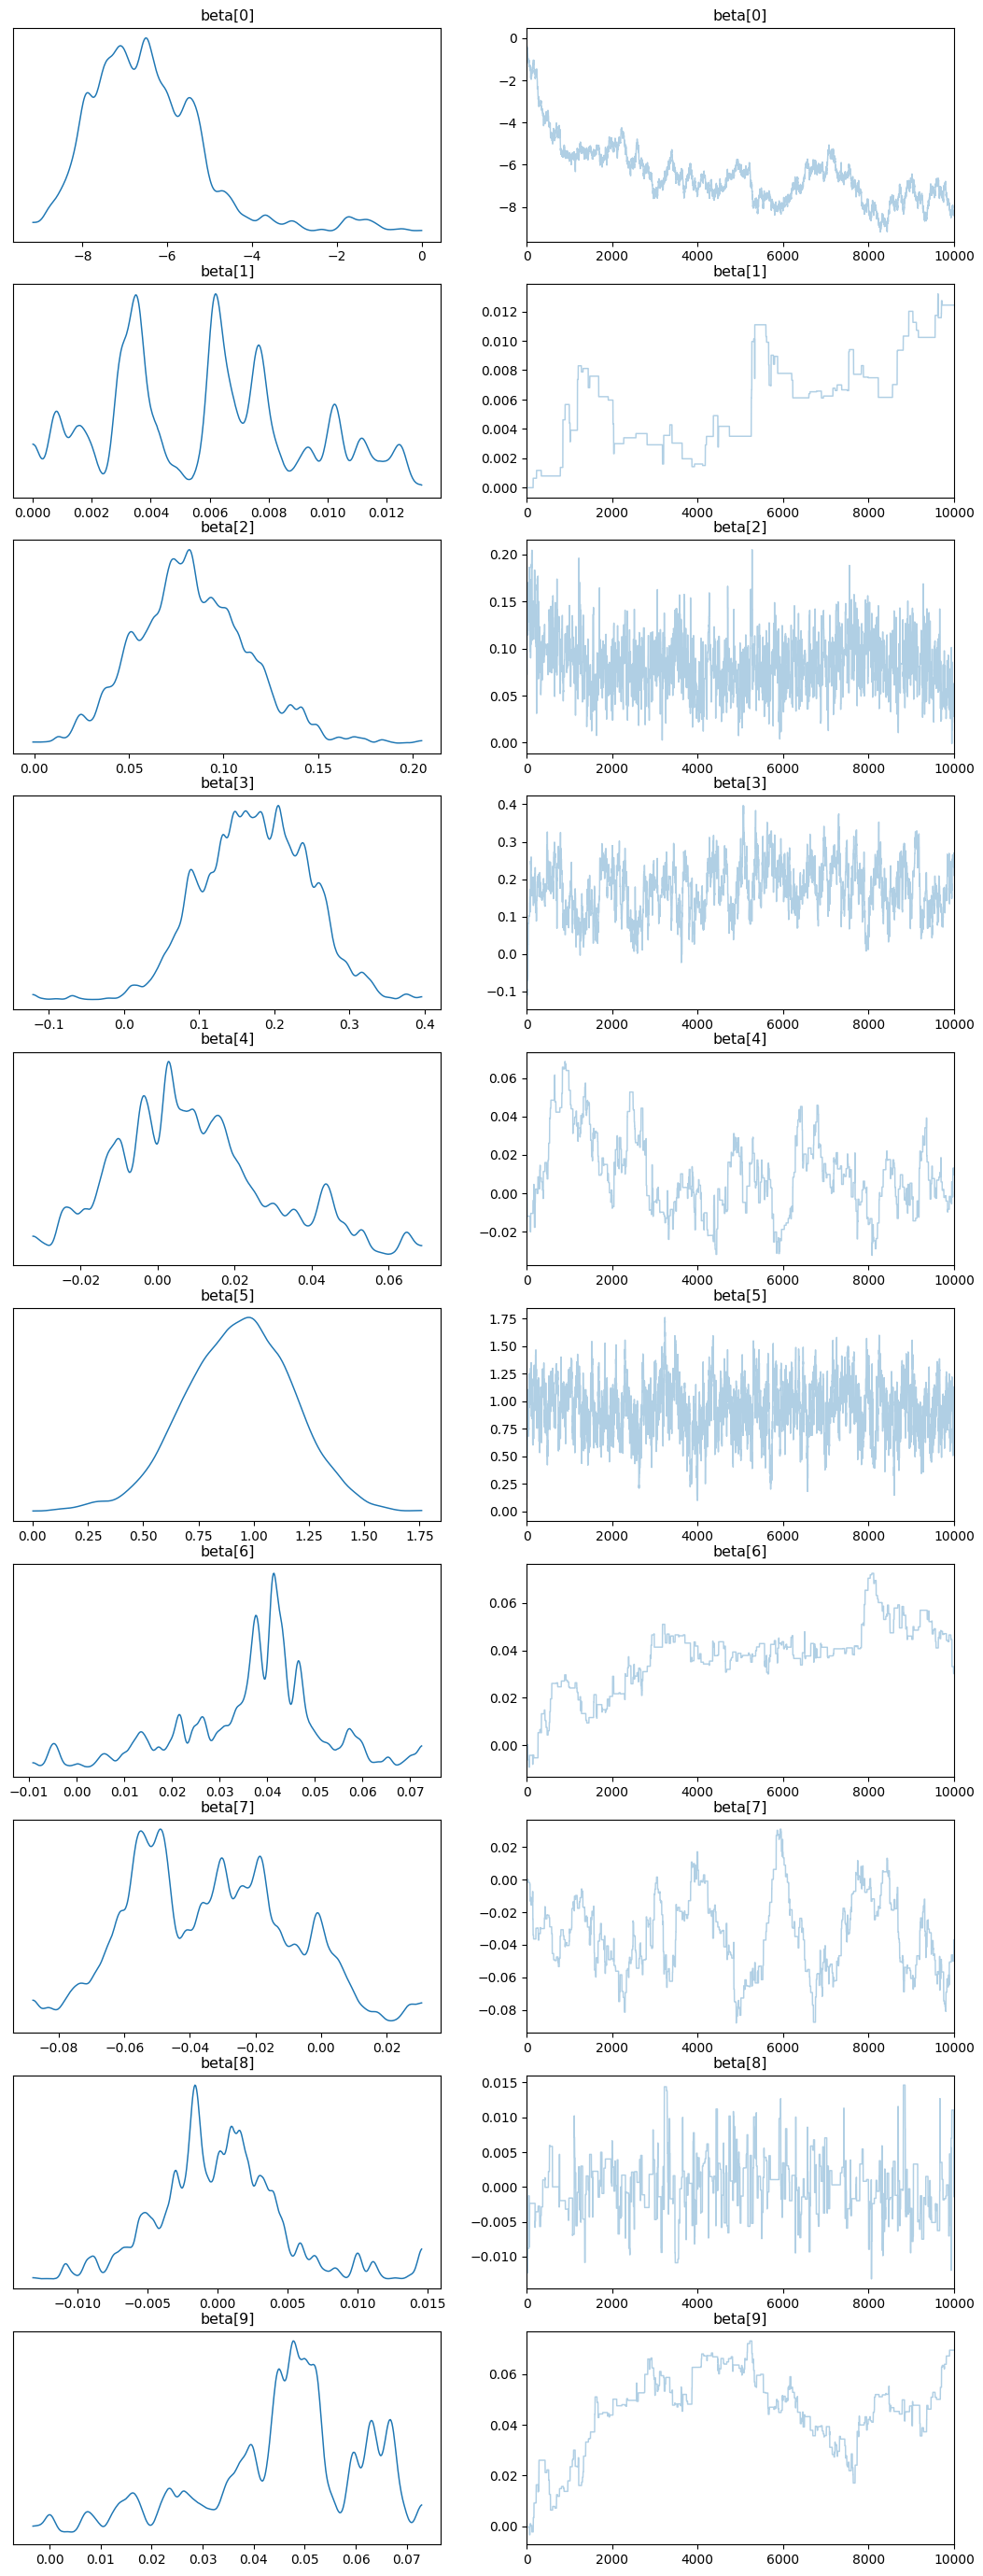

In [62]:
var_names = [f'beta[{i}]' for i in range(d)]
sample = to_arviz([beta], var_names)
az.plot_trace(sample, var_names=var_names, figsize=(13, 35));

(b) We repeat the results from Exercise 11 in Chapter 13:

In [63]:
import statsmodels.api as sm

In [64]:
fit = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial()).fit()

The estimates obtained from MCMC are consistent with those obtained from logistic regression:

In [65]:
alpha = 0.95

In [66]:
logreg_conf_ints = fit.conf_int(alpha)

In [67]:
pd.DataFrame({
    ('Logistic regression', 'Estimate'): fit.params,
    #('Logistic regression', '95% lower bound'): logreg_conf_ints[:, 0],
    #('Logistic regression', '95% upper bound'): logreg_conf_ints[:, 1],
    ('MCMC', 'Posterior mean'): np.mean(beta, axis=0),
    ('MCMC', '95% lower bound'): np.quantile(beta, (1 - alpha) / 2, axis=0),
    ('MCMC', '95% upper bound'): np.quantile(beta, (1 + alpha) / 2, axis=0),
})

Logistic regression           MCMC                                
             Estimate Posterior mean 95% lower bound 95% upper bound
0           -6.150721      -6.454594       -8.517786       -1.969098
1            0.006504       0.005849        0.000799        0.012430
2            0.079376       0.083851        0.028565        0.145517
3            0.173924       0.173755        0.043312        0.304057
4            0.018587       0.009547       -0.024090        0.052774
5            0.925370       0.931336        0.445849        1.387629
6            0.039595       0.036772        0.000000        0.065279
7           -0.062910      -0.033844       -0.074931        0.009727
8            0.000122       0.000019       -0.008801        0.010123
9            0.045225       0.045159        0.007204        0.068030